<a href="https://colab.research.google.com/github/subodhsd/Rossmann-Sales-Prediction/blob/main/Rossmann_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## Importing Library and loading Data

In [ ]:
#import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading Dataset
Rossmann_df=pd.read_csv("/content/drive/MyDrive/dat files in ml/capstone project/Data & Resources (1)/Rossmann Stores Data.csv")
store_df=pd.read_csv("/content/drive/MyDrive/dat files in ml/capstone project/Data & Resources (1)/store.csv")

##EDA

### 1.Rossmann Stores Dataset

In [ ]:
#Checking the shape of Rossmann Stores dataset
Rossmann_df.shape

(1017209, 9)

Rossmann Stores has 1017209 observation and 9 features.

In [ ]:
# Information about different column of the dataset
Rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


There is no null value in the dataset.
"Date" and "StateHoliday" feature are object type and all other features are integer type.

In [ ]:
#First 5 rows of Rossmann_df dataset
Rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### 2.store_df Dataset

In [ ]:
#Checking the shape of Stores dataset
store_df.shape

(1115, 10)

stor_df dataset has 1115 observation and 10 features.

In [ ]:
# Information about different column of the dataset
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There are missing values in it and it is important to impute them with appropriate values to get better results.

In [ ]:
#Checking null values in the store_df dataset
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

"CompetitionDistance" coloumn has 3 null value.
"CompetitionOpenSinceMonth" coloumn has 354 null value.
"CompetitionOpenSinceYear" coloumn has 354 null value.
"Promo2SinceWeek" coloumn has 544 null value.
"Promo2SinceYear" coloumn has 544 null value.
"PromoInterval" coloumn has 544 null value.

---



In [ ]:
#Top five observation of the dataset
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
#merging both dataset
merged_df=Rossmann_df.merge(store_df, how='left', on="Store")


'store' is the common feature for both the dataframe lets merge the two dataset on 'store' to get more insigths with respect to each store from marged dataset

In [ ]:
#Shape of merged dataset
merged_df.shape

(1017209, 18)

merged_df dataset has 1017209 observation and 18 features

In [ ]:
# Information about different column of the Dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
#Checking null values in the merged_df dataset
merged_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In combine dataset 
"CompetitionDistance" coloumn has 2642 null value. "CompetitionOpenSinceMonth" coloumn has 323348 null value. "CompetitionOpenSinceYear" coloumn has 323348 null value. "Promo2SinceWeek" coloumn has 508031 null value. "Promo2SinceYear" coloumn has 508031 null value. "PromoInterval" coloumn has 508031 null value.

In [ ]:
#description of sales,customers and competition distance respectively
merged_df.describe()[['Sales','Customers','CompetitionDistance']]

,Sales,Customers,CompetitionDistance
count,1.017209e+06,1.017209e+06,1.014567e+06
mean,5.773819e+03,6.331459e+02,5.430086e+03
std,3.849926e+03,4.644117e+02,7.715324e+03
min,0.000000e+00,0.000000e+00,2.000000e+01
25%,3.727000e+03,4.050000e+02,7.100000e+02
50%,5.744000e+03,6.090000e+02,2.330000e+03
75%,7.856000e+03,8.370000e+02,6.890000e+03
max,4.155100e+04,7.388000e+03,7.586000e+04


The above chart shows mimimum, 25 percentile,50 percentile, 75 percentile and mximum values of the sales, number of customers and competition distance respectively 

### Analysing categorial columns

In [ ]:
#description of categorical column
categorical_df=merged_df.loc[:, ~merged_df.columns.isin(['Sales','Customers','CompetitionDistance','Store','Date'])]

In [ ]:
#Value counts of each categorical column
for item in categorical_df.columns:
  valuecount_df=pd.DataFrame(categorical_df[item].value_counts().reset_index())
  valuecount_df.rename(columns = {'index':'uniue_values',item:"Count"}, inplace = True)
  print(f'Value Count Of {item} Column :\n\n{valuecount_df}\n')

Value Count Of DayOfWeek Column :

   uniue_values   Count
0             5  145845
1             4  145845
2             3  145665
3             2  145664
4             1  144730
5             7  144730
6             6  144730

Value Count Of Open Column :

   uniue_values   Count
0             1  844392
1             0  172817

Value Count Of Promo Column :

   uniue_values   Count
0             0  629129
1             1  388080

Value Count Of StateHoliday Column :

  uniue_values   Count
0            0  855087
1            0  131072
2            a   20260
3            b    6690
4            c    4100

Value Count Of SchoolHoliday Column :

   uniue_values   Count
0             0  835488
1             1  181721

Value Count Of StoreType Column :

  uniue_values   Count
0            a  551627
1            d  312912
2            c  136840
3            b   15830

Value Count Of Assortment Column :

  uniue_values   Count
0            a  537445
1            c  471470
2            b    82

In [ ]:
#change datatype to int type
merged_df['StateHoliday'].replace({'0':0}, inplace=True)

In [ ]:
#extracting current day, month, year, current week number from "date" column
def object_to_datetime(df):
  df["Date-time"]=pd.to_datetime(df['Date'])
  df['year'] = pd.DatetimeIndex(df['Date-time']).year
  df['month'] = pd.DatetimeIndex(df['Date-time']).month
  df['day'] = pd.DatetimeIndex(df['Date-time']).day
  df['current_week_number']=df["Date-time"].dt.week
  return df

In [ ]:
merged_df=object_to_datetime(merged_df)

## Data Visualization

### Week of Day Vs Daily Average Sales/Month vs Daily Average Sales/Year vs Daily Average Sales

In [ ]:
#finding daily average sales
avg_sale_day=merged_df.groupby('DayOfWeek').agg({'Sales':'mean'}).reset_index()
avg_sale_month=merged_df.groupby('month').agg({'Sales':'mean'}).reset_index()
avg_sale_year=merged_df.groupby('year').agg({'Sales':'mean'}).reset_index()

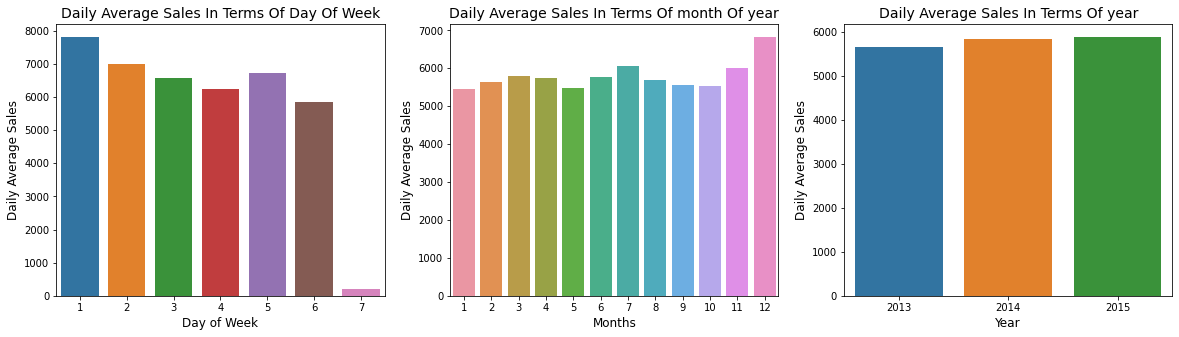

In [ ]:
fig, axes = plt.subplots(1, 3,figsize=(20,5));

sns.barplot(avg_sale_day['DayOfWeek'],avg_sale_day['Sales'],ax=axes[0]);
axes[0].set_title("Daily Average Sales In Terms Of Day Of Week",fontsize=14);
axes[0].set_ylabel("Daily Average Sales",fontsize=12);
axes[0].set_xlabel("Day of Week",fontsize=12);
sns.barplot(avg_sale_month['month'],avg_sale_month['Sales'],ax=axes[1]);
axes[1].set_title("Daily Average Sales In Terms Of month Of year",fontsize=14);
axes[1].set_ylabel("Daily Average Sales",fontsize=12);
axes[1].set_xlabel("Months",fontsize=12);
sns.barplot(avg_sale_year['year'],avg_sale_year['Sales'],ax=axes[2]);
axes[2].set_title("Daily Average Sales In Terms Of year",fontsize=14);
axes[2].set_ylabel("Daily Average Sales",fontsize=12);
axes[2].set_xlabel("Year",fontsize=12);

####Observation:
Among the 3 bar graphs

1.   First represents daily average sales in terms of day of week. Values 1-7 represent each day of the week. On day 7 the sales are very low because most of the stores are closed as it is sunday. Sales are high on monday, most probably because many stores are closed on sunday.
2.   Second represents daily average sales in terms of month of year. Month 12 that is december has the highest sales.
3.Third represents daily average sales in terms of year.


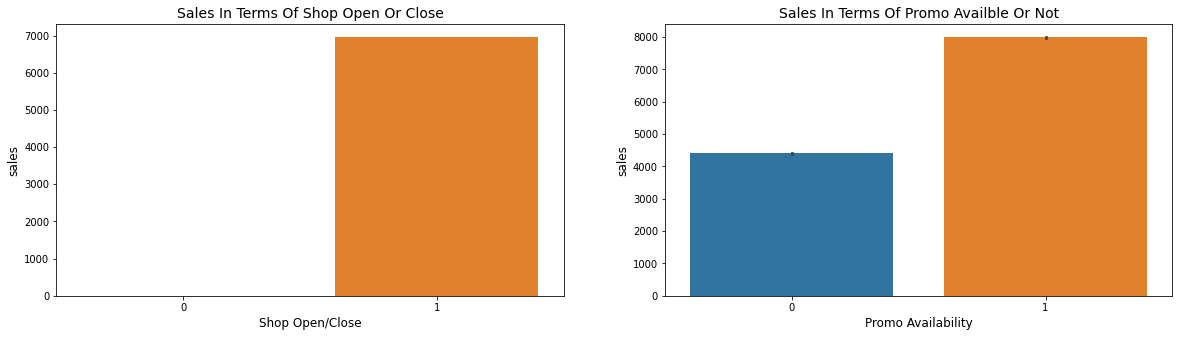

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(20,5));
sns.barplot(merged_df['Open'],merged_df['Sales'],ax=axes[0]);
axes[0].set_title("Sales In Terms Of Shop Open Or Close",fontsize=14);
axes[0].set_ylabel("sales",fontsize=12);
axes[0].set_xlabel("Shop Open/Close",fontsize=12);
sns.barplot(merged_df['Promo'],merged_df['Sales'],ax=axes[1]);
axes[1].set_title("Sales In Terms Of Promo Availble Or Not",fontsize=14);
axes[1].set_ylabel("sales",fontsize=12);
axes[1].set_xlabel("Promo Availability",fontsize=12);

####Observation:


*   First graph shows sales in terms of shop open or close. 0 represents shop is basically closed so there is no sale on that day.
*   Second graph shows sales In terms of promo availble or not. Sales are pretty high when promo is available.

